By: Coby Wilcox, Nicholas Roze-Freitas, Karam Singh, Nicole Huo
# Abstract

For the SingleStore 2024 UCSB Datathon, we created Vintner, a wine recommender that utilizes the chemical properties of wine. When provided with the dataset our curiosity led us to the exploration of how a wine's chemical properties can affect its qualities; resulting in research where we learned that different flavors and textures could be gleaned from these properties. To capture more complexity in Vintner, we merged the red and white wine quality datasets together. Through our research, weighted sums that can be found below were created for the properties of interest: sweetness, acidity, crispness, tartness, fruitiness. After removing outliers and applying transformations to important features, data was binned and uploaded to a Single Store SQL database for retreival by Vintner. Additionally, two recurrent neural networks were used to generate a plethora of wine names for the dataset. Lastly, Vintner utilizes a scikit-learn kNN model to create an initial batch of recommendations (that are refined through cosine dissimilarity in order to serve a variety of wines.)

# Methodology

## Research Backed Interactions 

Researching the chemical properties listed in the dataset allowed for us to understand the qualities we are able to utilize. Sweetness was determined heavily by residual sugars, and slightly by density and alcohol content. Acidity was determined by if the pH in relation to the recommended level, citric acid and fixed acidity. Crispness was determined by strongly by the fixed acidity and the citric acid, with higher levels corresponding to a more crisp wine. Fruitiness was affected heavily by the amount of molecular sulfur dioxide, pH in comparison to the recommendation and citric acid. Dryness was calculated as the inverse of sweetness, as they exist on opposite ends of a scale.

Interactions were calculated as follows: 

$$Sweetness = 2 * {residualSugars} + 0.5 * {density} + 10 - {alcoholContent}$$ 

$$Acidity = 4 * (1-{pH}/3.05) + 0.75 * {chlorides} + 4 * ({fixedAcidity}-9)$$

$$Crispness = 4 * {fixedAcidity} + 2 * {citricAcid}$$

$$ MolecularSulfurDioxide = \frac{{freeSulfurDioxide}}{1 + 10^{{pH}-1.8}} $$

$$ Fruitiness = 10 * ({MolecularSulfurDioxide} - 0.6) + 2 * (1-{pH}/3.05) + 2 * citricAcid$$

# Exploratory Analysis

## An Intial Peak
In our exploratory analysis we paid attention to the features that are used in our interactions, beggining with a look at how they are distributed. As shown below, several variables had many outliers and were left skewed.


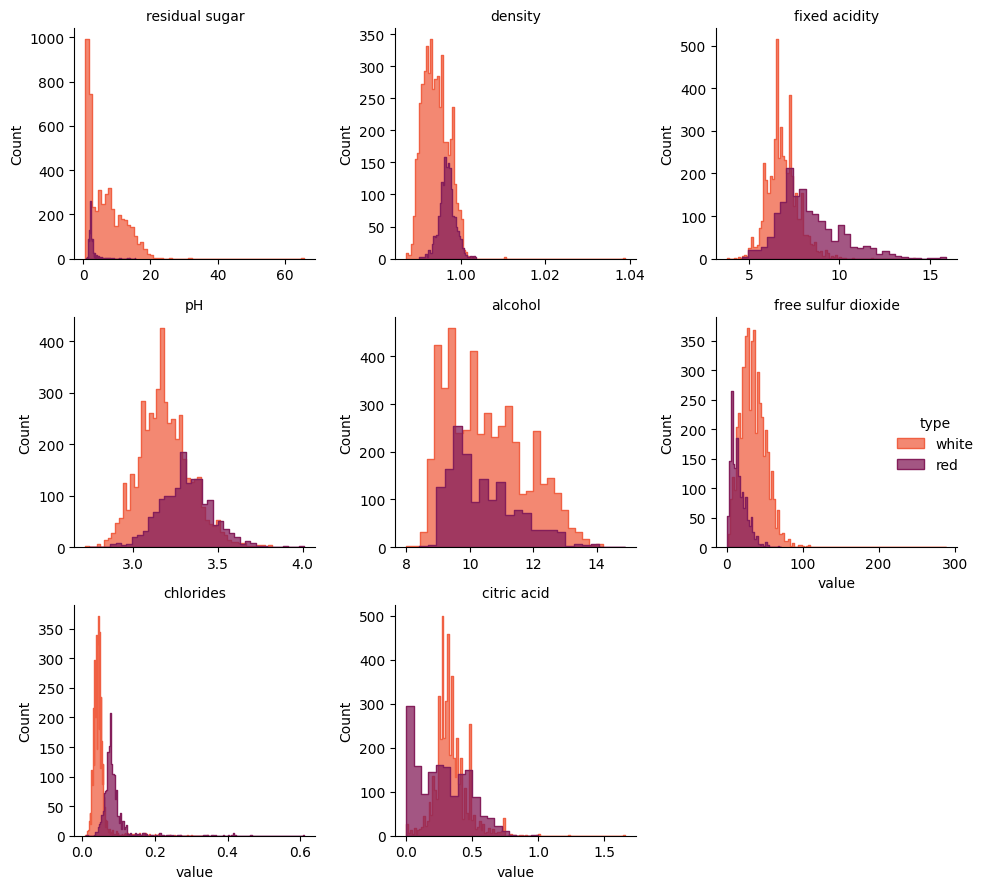


### Dealing With Outliers

To deal with outliers we utilized both IQR and Z-scores, to save space shown below is only the result for residual sugar and chlorides. Evidently, IQR provides better outlier removal so we decided to use that.


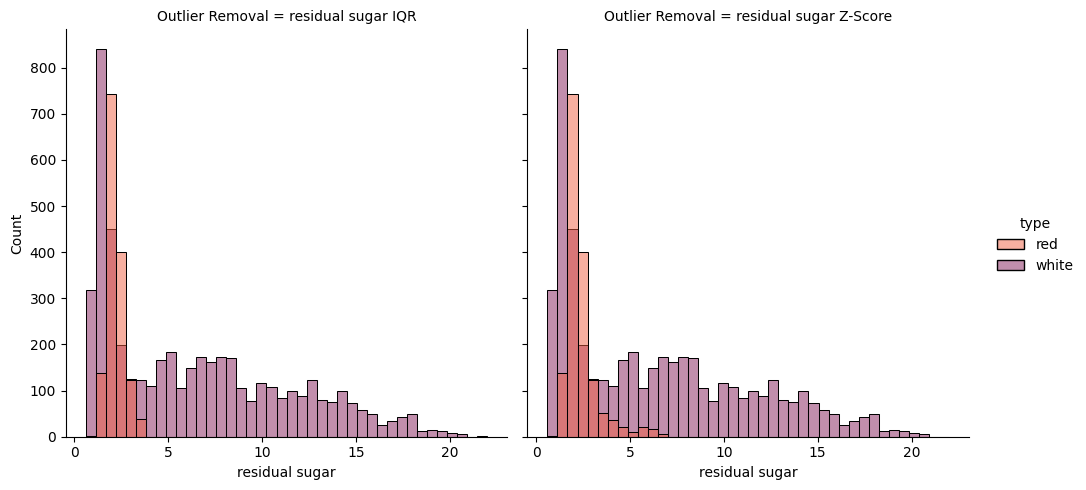
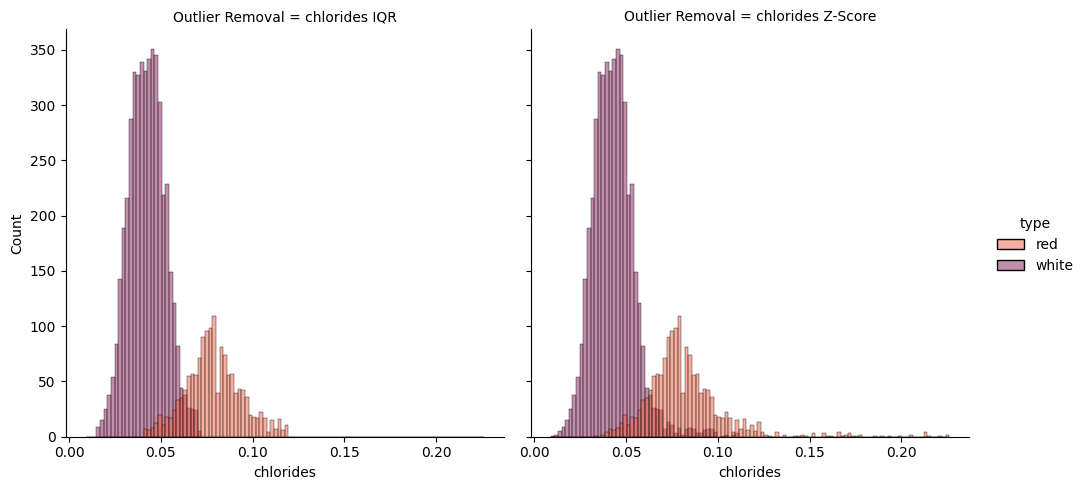

### Normalizing Data
Once outliers were moved, three different normalization methods were applied to the data: min-max, robust and z-score. Since free sulfur dioxide is needed in its current form to calculate the molecular sulfur dioxide it was not normalized. Pictured below is residual sugar and chlorides after being normalized. We decided to use the robust normalization method as it provided a larger distribution of values which we felt as though matched the real-world distribution of wines.

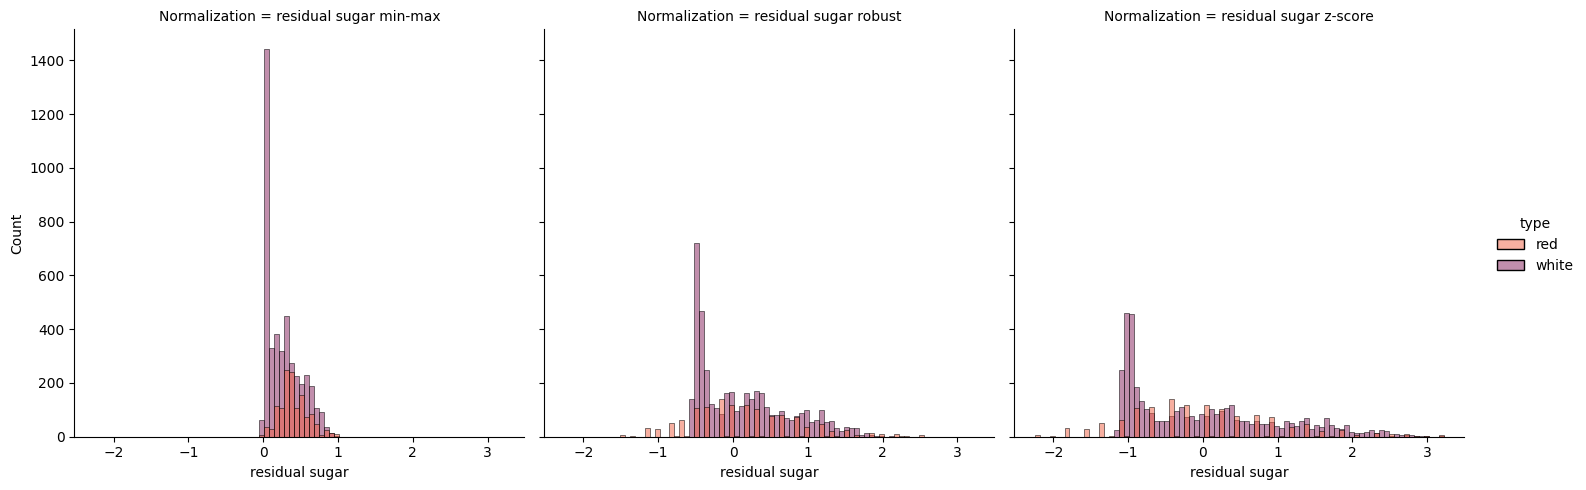
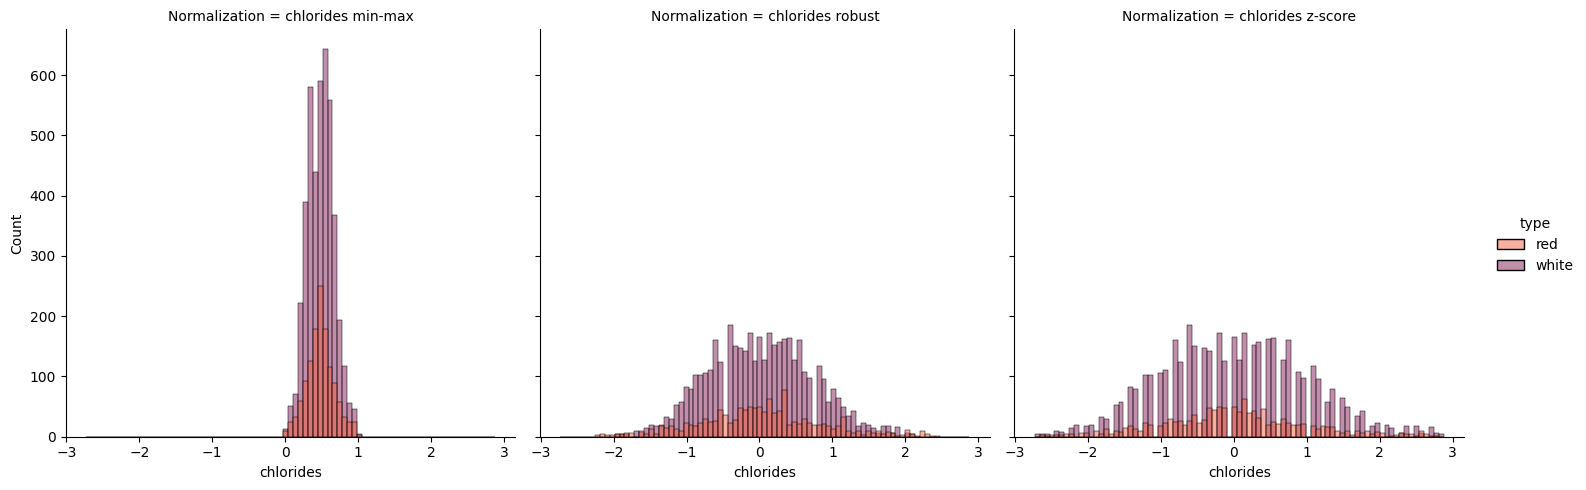

### Applying Interactions and Binning
Once our features of interest were transformed interactions were calculated and even binning was used to keep the properties of the distributions intact. Below is the distribution of sweetness after bins were applied.

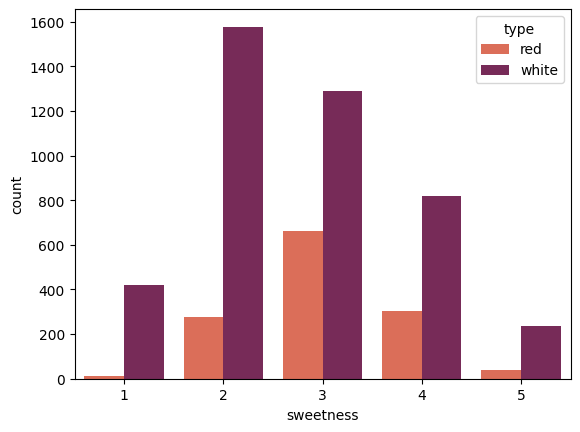

# Final Steps

## Name And Vintage Please

In order to add an extra level of penache to Vintner, we trained two character based recurrent neural networks with Tensorflow, one for red and one for white wines, on a corpus of wine names that was scraped from www.thebeerguy.ca. Resulting names were appended to the dataset to create more unique and interesting recommendations.

## Making Recommendations
A fake set of user profiles was generated by taking wine reviews from the wineSensed dataset and feeding them to the OpenAI api in order to evaluate their preferences. The recommender model that was utilized was the scikit-learn k-nearest-neighbors model which was trained and then stored for use within Vintner. In Vintner after the user takes a quiz on the web app, their response gets put into the recommender model, it finds nearest neighbor indices and then a query for the indices gets pushed to the database on SingleStore where the wines get returned. 

### Works Cited

https://terroirreview.com/2023/02/23/acidity-in-wine/
https://chemicalstore.com/citric-acid-in-wine/
https://novocastrianvintnersgazette.wordpress.com/2018/07/16/rough-guide-to-acidity/ 
https://whicherridge.com.au/blog/what-is-residual-sugar-in-wine/
https://www.guildsomm.com/public_content/features/articles/b/jamie_goode/posts/the-taste-of-wine-acid-sweetness-and-tannin
https://www.bibendum-wine.co.uk/wine-gym/wine-and-residual-sugar/
https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf
https://www.awri.com.au/wp-content/uploads/2018/08/s1530.pdf
https://www.researchgate.net/publication/284261946_Determination_of_NaCl_detection_and_recognition_thresholds_in_grape_juice_and_wine_and_sensory_perception_of_salt_in_white_wine
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3472855/#:~:text=In%20the%20wine%20industry%2C%20sulfur,freshness%20of%20aroma%20%5B1%5D
https://www.researchgate.net/publication/280742754_Threshold_of_Sensory_Perception_of_Sulphur_Dioxide_in_Herzegovinian_White_Wines#:~:text=The%20results%20showed%20that%20in,%2C%20sharp%2C%20and%20unpleasant%20odour
https://www.extension.iastate.edu/wine/sulfur-dioxide-measurement-and-overestimation-red-wine/#:~:text=A%20target%20of%200.6%2D0.8,hit%20the%20target%20molecular%20SO2
https://www.extension.iastate.edu/wine/crush-crushing-it-so2/
https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/
https://winemakermag.com/wine-wizard/judging-fermentation-completion#:~:text=Depending%20on%20which%20source%20you,around%200.990%E2%80%930.996%20specific%20gravity
https://www.homebrewtalk.com/threads/dryness-or-sweetness-vs-specific-gravity.365847/
https://www.awri.com.au/industry_support/winemaking_resources/frequently_asked_questions/acidity_and_ph/#:~:text=The%20pH%20influences%20microbiological%20stability,1996
https://atlas-scientific.com/blog/the-importance-of-ph-in-wine-making/#:~:text=Wines%20with%20a%20lower%20pH,this%20aspect%20of%20the%20wine
https://sensorex.com/ph-improve-taste-color-wine/#:~:text=Usually%2C%20a%20wine%20will%20fall,falling%20between%203.3%20and%203.6
https://sensorex.com/ph-wine-making/
https://morewinemaking.com/articles/testing_wine_must
https://www.orangecoastwinery.com/blog/Wine-Alcohol-Content--How-it-Changes-What-You-Taste#:~:text=Generally%2C%20the%20bolder%20and%20sweeter,between%2012.5%25%20and%2015%25
https://cellaraiders.com/blogs/news/abv-of-wine
https://www.themanual.com/food-and-drink/wine-alcohol-content-taste-guide/